# KNN simples

Explorando o KNN com datasets simples

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data, target = load_iris(return_X_y=True, as_frame=False)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

X_train.shape[0], X_test.shape[0]

(120, 30)

Normalização

Neste caso, como os atributos são comparáveis e as escalas não são absurdamente diferentes, não é necessário realizar a normalização. Porém, caso for utilizar, é necessário tomar cuidado com a distribuição dos dados, vamos analisar:

/home/huber/projects/ml-studies/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/huber/projects/ml-studies/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/huber/projects/ml-studies/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/huber/projects/ml-studies/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

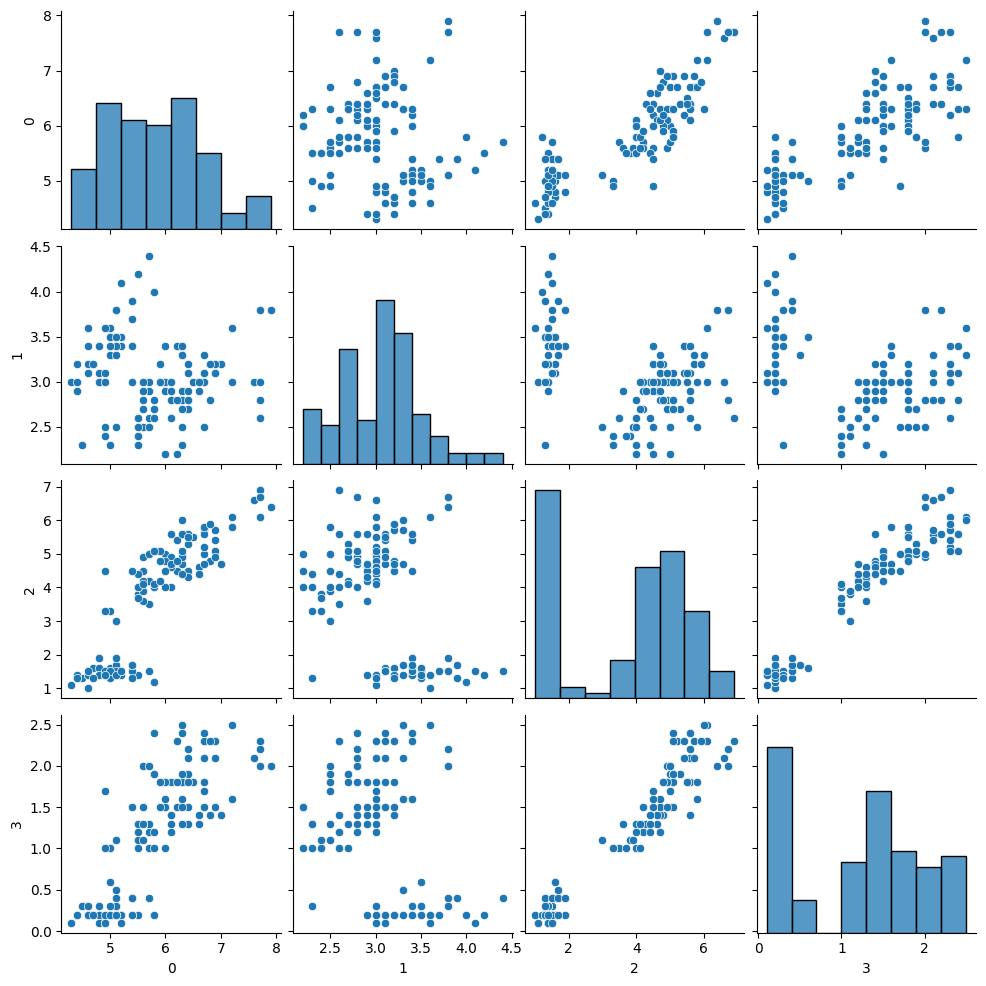

In [3]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train))

Os atributos 3 e 4 que correspondem ao comprimento e largura da pétala não aparentam ser distribuições gaussianas (precisa testar para confirmar), dessa forma, não seria bom utilizar a normalização por padronização, pois este método assume uma gaussiana como entrada. Dessa forma, podemos utilizar a normalização por escala (MinMaxScaler) para não alterar o formato da distribuição.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0], X_test[0]

(array([0.55555556, 0.31818182, 0.77966102, 0.70833333]),
 array([0.19444444, 0.45454545, 0.03389831, 0.04166667]))

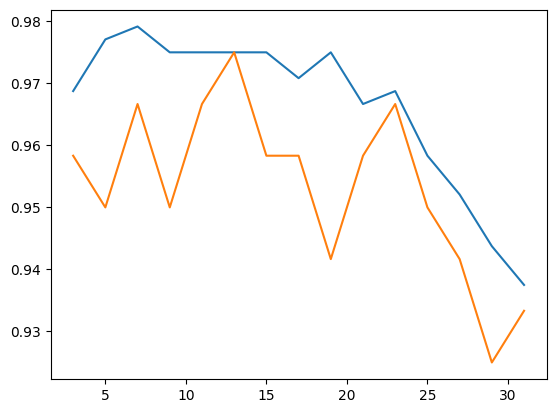

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold.get_n_splits(X_train, y_train)

mean_train_acc, mean_val_acc = [], []

for k in range(3, 32, 2):
    train_score, val_score = [], []
    for i, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train[train_index], y_train[train_index])

        y_pred = model.predict(X_train[train_index], )
        train_score.append( accuracy_score(y_train[train_index], y_pred) )

        y_pred = model.predict(X_train[val_index])
        val_score.append( accuracy_score(y_train[val_index], y_pred) )

    mean_train_acc.append( np.mean(train_score) )
    mean_val_acc.append( np.mean(val_score) )


results_df = pd.DataFrame({
    "k": range(3, 32, 2),
    "train acc": mean_train_acc,
    "val acc": mean_val_acc

})

plt.plot(results_df["k"], results_df["train acc"])
plt.plot(results_df["k"], results_df["val acc"])

In [6]:
results_df

,k,train acc,val acc
0,3,0.968750,0.958333
1,5,0.977083,0.950000
2,7,0.979167,0.966667
3,9,0.975000,0.950000
4,11,0.975000,0.966667
5,13,0.975000,0.975000
6,15,0.975000,0.958333
7,17,0.970833,0.958333
8,19,0.975000,0.941667
9,21,0.966667,0.958333


Final model and results report

In [7]:
best_k = 11

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
train_score = accuracy_score(y_train, y_pred)

y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Final train score: {100 * train_score:.2f}%")
print(f"Final test score: {100 * test_score:.2f}%")

Final train score: 97.50%
Final test score: 93.33%


In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
c = classification_report(y_test, y_pred)
print(c)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## kNN Ponderado

É possível utilizar o kNN ponderado, onde além de usar a moda dos vizinhos para classificar, os votos dos vizinhos são ponderados com base na distância (inversa) do ponto atual até o vizinho, dessa forma, vizinhos mais próximos terão "maior" poder de voto. Isso também permite usar valores ímpares para o $k$, dado que a probabilidade de empate reduz drasticamente.


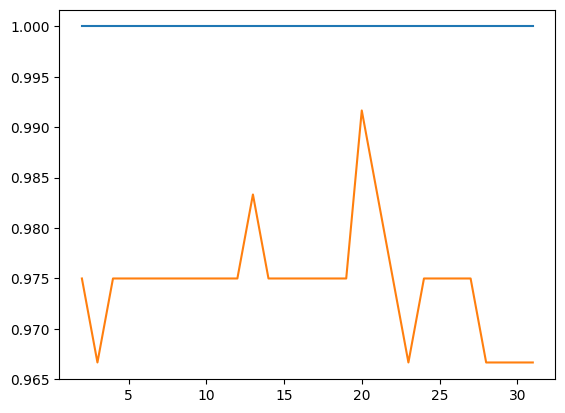

In [9]:
data, target = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold.get_n_splits(X_train, y_train)

mean_train_acc, mean_val_acc = [], []

for k in range(2, 32, 1):
    train_score, val_score = [], []
    for i, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        model = KNeighborsClassifier(n_neighbors=k, weights="distance")
        model.fit(X_train[train_index], y_train[train_index])

        y_pred = model.predict(X_train[train_index], )
        train_score.append( accuracy_score(y_train[train_index], y_pred) )

        y_pred = model.predict(X_train[val_index])
        val_score.append( accuracy_score(y_train[val_index], y_pred) )

    mean_train_acc.append( np.mean(train_score) )
    mean_val_acc.append( np.mean(val_score) )


results_df = pd.DataFrame({
    "k": range(2, 32, 1),
    "train acc": mean_train_acc,
    "val acc": mean_val_acc

})

plt.plot(results_df["k"], results_df["train acc"])
plt.plot(results_df["k"], results_df["val acc"])

In [10]:
results_df

,k,train acc,val acc
0,2,1.0,0.975000
1,3,1.0,0.966667
2,4,1.0,0.975000
3,5,1.0,0.975000
4,6,1.0,0.975000
5,7,1.0,0.975000
6,8,1.0,0.975000
7,9,1.0,0.975000
8,10,1.0,0.975000
9,11,1.0,0.975000


In [11]:
best_k = 7

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
train_score = accuracy_score(y_train, y_pred)

y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Final train score: {100 * train_score:.2f}%")
print(f"Final test score: {100 * test_score:.2f}%")

Final train score: 97.50%
Final test score: 90.00%


Apesar do aumento de acurácia no treinamento, é possível observar o sobreajuste (overfitting) ocorrendo sempre.

# kNN com atributos contínuos e categóricos

In [19]:
import pathlib

if not pathlib.Path("./titanic/train.csv").exists():
    ! kaggle competitions download -c titanic
    ! unzip titanic.zip -d titanic

In [44]:
train_df = pd.read_csv("titanic/train.csv")

# Pré-processamento básico
train_df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], inplace=True)
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked", "Pclass"])
target = train_df["Survived"]
train_df = train_df.drop(columns=["Survived"])

train_df.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


Como o atributo `Fare` e `Age` possuem escalas diferentes dos demais atributos, é muito importante realizar a etapa de normalização dos atributos para o cálculo das distâncias.

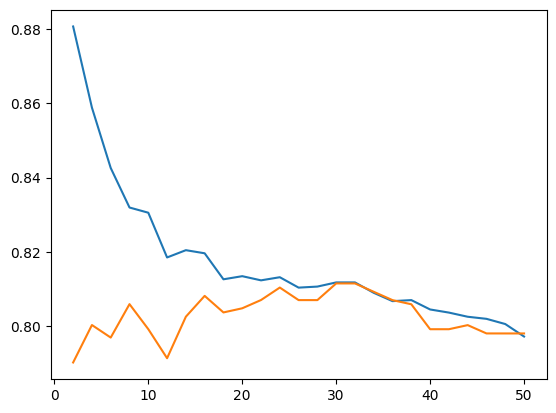

In [50]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold.get_n_splits(X_train, y_train)

mean_train_acc, mean_val_acc = [], []

X_train = train_df.values
y_train = target.values

for k in range(2, 52, 2):
    train_score, val_score = [], []
    
    for i, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        scaler = MinMaxScaler()
        scaler.fit(X_train[train_index])
        X_train  = scaler.transform(X_train)
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train[train_index], y_train[train_index])

        y_pred = model.predict(X_train[train_index], )
        train_score.append( accuracy_score(y_train[train_index], y_pred) )

        y_pred = model.predict(X_train[val_index])
        val_score.append( accuracy_score(y_train[val_index], y_pred) )

    mean_train_acc.append( np.mean(train_score) )
    mean_val_acc.append( np.mean(val_score) )


results_df = pd.DataFrame({
    "k": range(2, 52, 2),
    "train acc": mean_train_acc,
    "val acc": mean_val_acc

})

plt.plot(results_df["k"], results_df["train acc"])
plt.plot(results_df["k"], results_df["val acc"])